In [1]:
import numpy as np
from keras.preprocessing import image
from keras.models import load_model
import matplotlib.pyplot as plt
from instance_normalization import InstanceNormalization
from my_upsampling_2d import MyUpSampling2D
from FgSegNet_v2_module import loss, acc, loss2, acc2
import tensorflow as tf
import cv2
def load_image(path):
    x = image.load_img(path)
    x = image.img_to_array(x)
    x = cv2.resize(x, (int(536), int(416)))
    x = np.expand_dims(x, axis=0)
    return x

Using TensorFlow backend.


In [2]:
# Segment on a single CPU for this test
# Want to speed up training or testing?
# Read my blog post at https://towardsdatascience.com/a-comprehensive-guide-on-how-to-fine-tune-deep-neural-networks-using-keras-on-google-colab-free-daaaa0aced8f

# a sample FgSegNet_v2 model can be downloaded at https://drive.google.com/open?id=1Rr-NCcYdNKtDfQWGYWhRVDDvCLnXASLz
# a sample test frame can be downloaded at https://drive.google.com/open?id=1pONZTp604CFg5MSqTknj875hYAYTtifE
image_path = '/home/anish/FgSegNet_v2-master/datasets/SBI2015_dataset/train/input/158.png'
#image_path ="/home/anish/Downloads/resize-15897880709460665360.png"

#model_path = 'mdl_highway_fgsegnet_v2.h5'
model_path = '/home/anish/FgSegNet_v2-master/scripts/weightsss00000010.h5'

x = load_image(image_path) # load a test frame
model = load_model(model_path, custom_objects={'tf':tf,'MyUpSampling2D': MyUpSampling2D, 'InstanceNormalization': InstanceNormalization, 'loss':loss, 'acc':acc, 'loss2':loss2, 'acc2':acc2}) #load the trained model
probs = model.predict(x, batch_size=1, verbose=1)
print(probs.shape) # (1, 240,320,1)
probs = probs.reshape([probs.shape[1], probs.shape[2]])
print(probs.shape) # (240,320)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


/home/anish/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


1/1 [==============================] - 5s 5s/step
(1, 416, 536, 1)
(416, 536)


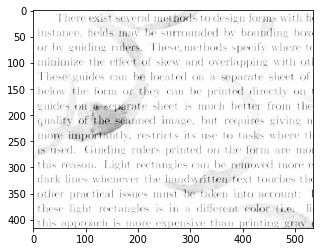

In [3]:
# plot the first segmentation mask

plt.subplot(1, 1, 1)
plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.rcParams['image.cmap'] = 'gray'

plt.imshow(probs)

#plt.title('Segmentation mask before thresholding')
#plt.axis('off')
plt.savefig('pred3.png')
plt.show()

In [16]:
from PIL import Image
import PIL
x = image.load_img('pred2.png')
#x = image.img_to_array(x).astype('float32')
Image.ImageOps.autocontrast(x, cutoff=0, ignore=None)

AttributeError: module 'PIL.Image' has no attribute 'ImageOps'

In [ ]:
import cv2
x=cv2.imread('pred2.png')
x = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
x=cv2.equalizeHist(x)
cv2.imshow('cwd',x)
#cv2.waitKey()

In [12]:
from PIL import Image
img = Image.fromarray(x, 'RGB')
img.save('my.png')
img.show()

In [14]:
# Thresholding (one can specify any threshold values)
threshold = 0.8
probs[probs<threshold] = 0.
probs[probs>=threshold] = 1.

plt.subplot(1, 1, 1)
plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.rcParams['image.cmap'] = 'gray'

plt.imshow(probs)

plt.title('Segmentation mask after thresholding')
plt.axis('off')
plt.savefig('PRED2.png')
plt.show()


In [6]:
import os
os.getcwd()

'/home/anish/FgSegNet_v2-master/scripts'

In [4]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [20]:
%matplotlib
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
img = Image.open("/home/anish/FgSegNet_v2-master/training_sets/SBI2015_train/train/158.png")
plt.imshow(img)
plt.show()

Using matplotlib backend: Qt5Agg
